In [946]:
# Εισαγωγή των απαραίτητων βιβλιοθηκών.
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [947]:
# Εισαγωγή των δεδομένων από το αρχείο songs.csv.
songs = pd.read_csv('songs.csv')


# Συμπλήρωση των τιμών που λείπουν
# από κάθε στήλη με την μέση τιμή των τιμών που υπάρχουν.
songs = songs.fillna(songs.mean())
songs

C:\Users\user\AppData\Local\Temp\ipykernel_8788\1239545846.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  songs = songs.fillna(songs.mean())


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


array([[<AxesSubplot: title={'center': 'popularity'}>]], dtype=object)

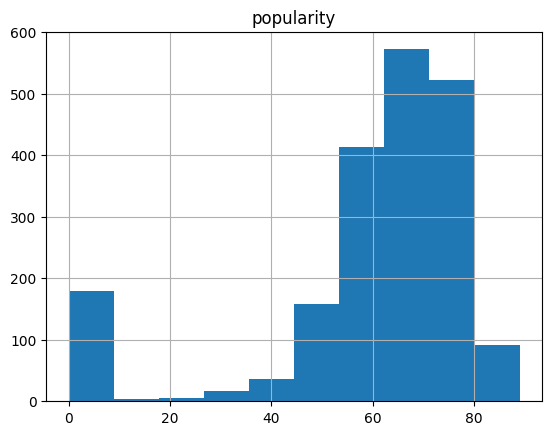

In [948]:
# Φτιάχνουμε ιστόγραμματα των χαρακτηριστικών που θα χρησιμοποιήσουμε για την άσκηση.
songs.hist(column='popularity')


array([[<AxesSubplot: title={'center': 'danceability'}>]], dtype=object)

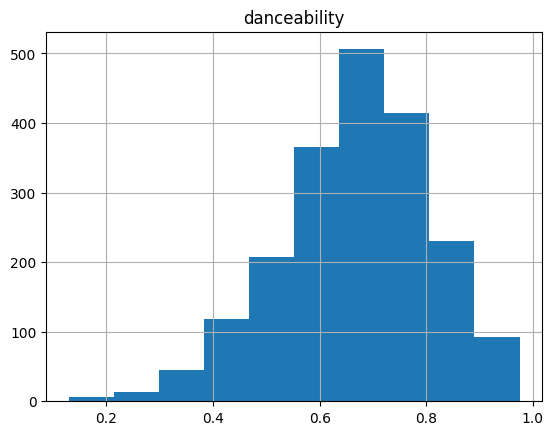

In [949]:
songs.hist(column='danceability')

array([[<AxesSubplot: title={'center': 'energy'}>]], dtype=object)

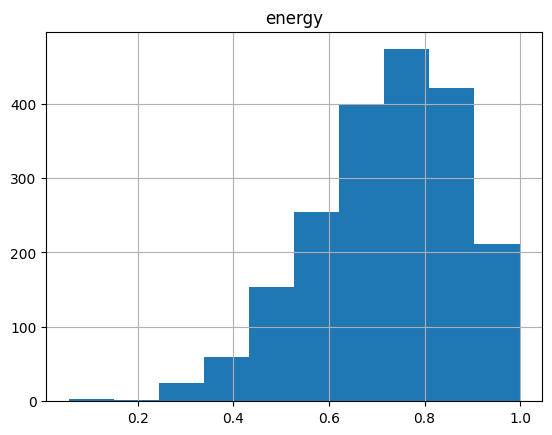

In [950]:
songs.hist(column='energy')

array([[<AxesSubplot: title={'center': 'valence'}>]], dtype=object)

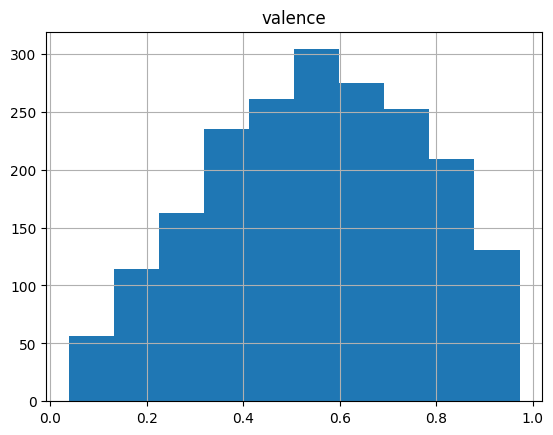

In [951]:
songs.hist(column='valence')

In [952]:
# Αφαίρεση των τιμών που δέν χρειαζόμαστε από το dataframe.
# Το προσαρμόζουμε ανάλογα με τις πληροφορίες που θέλουμε να αντλήσουμε.
songs = songs.drop([
    'duration_ms',
    'explicit',
    'year',
    # 'popularity',
    # 'danceability',
    # 'energy',
    'key',
    'loudness',
    'mode',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    # 'valence',
    'tempo',
    'genre'
], axis=1)

songs

,artist,song,popularity,danceability,energy,valence
0,Britney Spears,Oops!...I Did It Again,77,0.751,0.834,0.894
1,blink-182,All The Small Things,79,0.434,0.897,0.684
2,Faith Hill,Breathe,66,0.529,0.496,0.278
3,Bon Jovi,It's My Life,78,0.551,0.913,0.544
4,*NSYNC,Bye Bye Bye,65,0.614,0.928,0.879
...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,79,0.842,0.734,0.952
1996,Taylor Swift,Cruel Summer,78,0.552,0.702,0.564
1997,Blanco Brown,The Git Up,69,0.847,0.678,0.811
1998,Sam Smith,Dancing With A Stranger (with Normani),75,0.741,0.520,0.347


In [953]:
col_features = ['energy','danceability', 'valence']
# Κανονικοποίηση των στοιχείων του dataframe.
X = MinMaxScaler().fit_transform(songs[col_features])

CPU times: total: 78.1 ms
Wall time: 252 ms


Text(0.5, 0.92, '3D scatter plot of songs clustered')

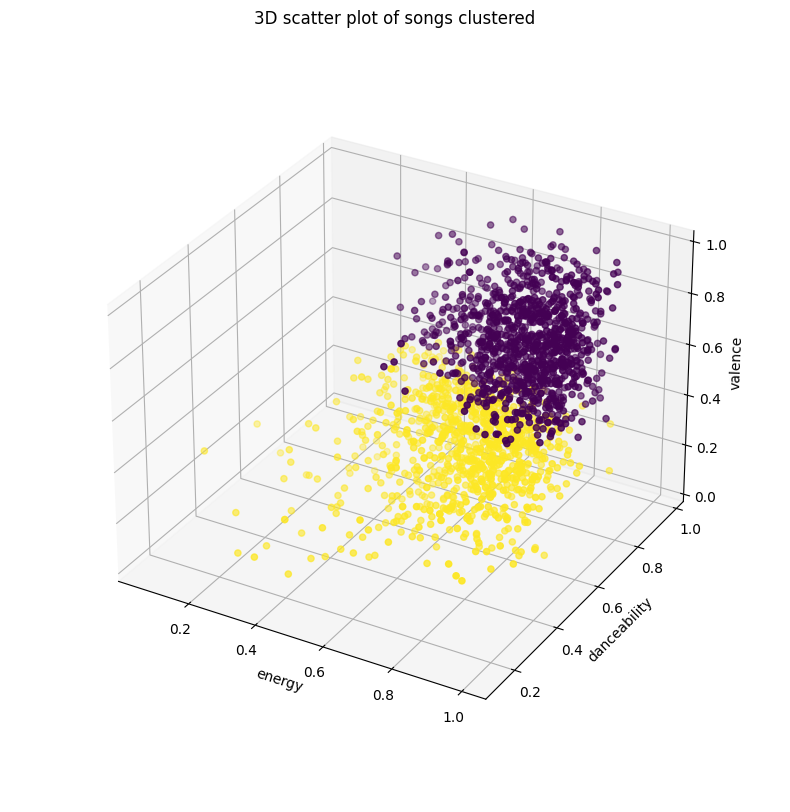

In [954]:
# Εφαρμογή του αλγόριθμου KMeans για την ομαδοποίηση των δεδομένων.
k = 2
%time kmeans = KMeans(init='k-means++', n_clusters=k).fit(X)
songs['kmeans'] = kmeans.labels_

# Σχεδιάση του 3D scatter plot.
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect(None, zoom=0.85)
ax.scatter(songs['energy'], songs['danceability'],
           songs['valence'], c=songs['kmeans'])
# Ετικέτες των αξόνων.
ax.set_xlabel('energy')
ax.set_ylabel('danceability')
ax.set_zlabel('valence')
ax.set_title('3D scatter plot of songs clustered')

In [955]:
# Μέσος όρος των χαρακτηριστικών των ομάδων.
songs.groupby(['kmeans']).mean()

C:\Users\user\AppData\Local\Temp\ipykernel_8788\1281148328.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  songs.groupby(['kmeans']).mean()


,popularity,danceability,energy,valence
kmeans,,,,
0,59.526667,0.727390,0.764780,0.723974
1,60.254737,0.601175,0.671277,0.361270


In [956]:
# Υπλογισμός της ακρίβειας του αλγορίθμου μας με τις τιμές SSE και silhouette coefficient.
sse = kmeans.inertia_
print('SSE(sum of squared errors):', sse)
sc = metrics.silhouette_score(X, kmeans.labels_)
print('Silhouette Coefficient:', sc)

SSE(sum of squared errors): 127.89925334685269
Silhouette Coefficient: 0.355092483727035


In [957]:
# Φτιάχνουμε dataframes για κάθε cluster (βάζουμε loop σε περίτπωση που έχουμε πολλά clusters).
cluster0 = songs[songs['kmeans'] == 0]
cluster1 = songs[songs['kmeans'] == 1]

In [958]:
# Με βάση τον μέσο όρο των τιμών του κάθε cluster, ορίζουμε ποίο περιέχει τα κατάλληλα τραγούδια.
# Κατάταξη βάση του χαρακτηριστικού danceability.
cluster0 = cluster0.sort_values(by='danceability', ascending=False)
cluster0.head(100)

,artist,song,popularity,danceability,energy,valence,kmeans
714,Timbaland,Give It To Me,70,0.975,0.711,0.815,0
425,Kelis,Trick Me,63,0.970,0.720,0.962,0
225,Missy Elliott,4 My People (feat. Eve),49,0.969,0.701,0.905,0
602,Justin Timberlake,SexyBack (feat. Timbaland),78,0.967,0.583,0.964,0
618,Ciara,Get Up (feat. Chamillionaire),59,0.964,0.595,0.629,0
...,...,...,...,...,...,...,...
840,Dizzee Rascal,Dance Wiv Me - Radio Edit,68,0.878,0.746,0.792,0
552,Destiny's Child,Soldier (feat. T.I. & Lil' Wayne),63,0.878,0.417,0.904,0
1900,Lil Nas X,Old Town Road - Remix,79,0.878,0.619,0.639,0
509,Akon,Bananza (Belly Dancer),28,0.878,0.699,0.666,0


In [959]:
cluster1 = cluster1.sort_values(by='danceability', ascending=False)
cluster1.head(100)

,artist,song,popularity,danceability,energy,valence,kmeans
1948,Cardi B,Money,73,0.950,0.590,0.219,1
1823,6ix9ine,FEFE,42,0.931,0.387,0.376,1
1243,Tyga,Rack City,61,0.929,0.339,0.273,1
1753,Migos,Bad and Boujee (feat. Lil Uzi Vert),72,0.926,0.666,0.168,1
19,Dr. Dre,The Next Episode,82,0.922,0.909,0.309,1
...,...,...,...,...,...,...,...
1903,Ariana Grande,7 rings,83,0.778,0.317,0.327,1
233,Disturbing Tha Peace,Move Bitch,59,0.777,0.751,0.191,1
1526,Lost Frequencies,Are You With Me - Radio Edit,33,0.776,0.574,0.412,1
1695,Beyoncé,Sorry,67,0.775,0.598,0.356,1
